In [18]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [4]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [16]:
# fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
# fmap[:, 3, 0, 0] = 1
# fmap[3, :, 0, 1] = 1
# plot_image(fmap[:, :, 0, 0])
# plt.show()
# plot_image(fmap[:, :, 0, 1])
# plt.show()

In [6]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

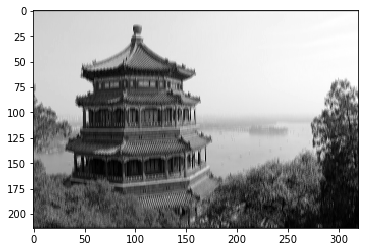

In [29]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

In [32]:
# plt.imshow(china,cmap="gray")
# plt.show()

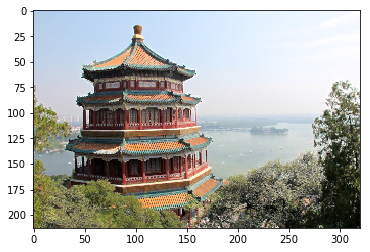

In [40]:
# Create a graph with input X plus a max pooling layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()